# Лабораторная №1. Проверка статистических гипотез
> Вариант № 7

**Распределения**:

$X_1$ ~ N(-1;2) (объём выборки $n_1$ = 100) 

$X_2$ ~ R(-2;0) (объём выборки $n_2$ = 100) 

Гипотеза:
$\sigma_1$ = 2($m_1$ не известн.)

---

*Импорт необходимых библиотек:*

In [17]:
%matplotlib inline
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

## Генерация выборок

`x = np.random.<`*`distribution`*`>(`*`...params`*`, `*`size`*`)`, где

- *distribution* - распределение;
- *...params* - параметры распределения;
- *size* - размер выборки

Доступные распределения:

- нормальное: normal(m, $\sigma^2$)
- равномерное: uniform(a, b)
- хи-квадрат: chisquare(k)


In [20]:
sample = [8.6, 9.7, 7.83, 8.77, 9.15, 9.40, 9.36, 8.9, 10.22, 7.13]
(np.mean(sample) - 9 ) / ((0.75) / np.sqrt(10))
stats.norm.ppf(0.25, 0,1)

-0.6744897501960817

In [6]:
# Размеры выборок
n1 = 100
n2 = 100

# Функции для получения выборок
def gen_x1():
    return np.random.normal(-1, 2, n1)

def gen_x2():
    return np.random.uniform(-2, 0, n2)

# Конкретные выборки
x1, x2 = gen_x1(), gen_x2()

## 1. Выборочные характеристики

**Необходимо**:

1. Описать распределения $X_1$ и $X_2$, найти их МО и дисперсию, указать объём выборок

2. Рассчитать выборочные характеристики: среднее, $s$, $s^2$

3. Рассчитать выборочные характеристики для совокупной выборки $x_1$ + $x_2$


In [8]:
# пример вызова функций
def print_sample_chars(sample):
    print("Среднее {}, s={}, s^2={}".format(
        np.mean(sample),
        np.std(sample),
        np.var(sample)
    ))

print_sample_chars(x1)
print_sample_chars(x2)
pooled = np.concatenate([x1, x2])
print_sample_chars(pooled)
print_sample_chars(sample)

Среднее -0.9885970805199719, s=1.8683973850298017, s^2=3.4909087883862013
Среднее -1.015544293936899, s=0.5936822306460149, s^2=0.352458590984828
Среднее -1.0020706872284355, s=1.3863135387650405, s^2=1.9218652277632493
Среднее 8.906, s=0.8538641578143447, s^2=0.7290840000000001


**Указания**:

- `np.mean` - среднее значение
- `np.std` - $s$ - оценка с.к.о.
- `np.var` - $s^2$ - оценка дисперсии

## 2. Однопараметрические критерии

**Необходимо**:

Для СВ $X_1$ сформулировать гипотезы $H_0$, проверяемые следующими тестами:

1. z-test
2. t-test
3. $\chi^2-test$ ($m$ известно)
4. $\chi^2-test$ ($m$ неизвестно)

Для каждой гипотезы рассчитать выборочное значение статистики критерия, p-value, выбрать уровень значимости $\alpha$ и рассчитать ошибку статистического решения.

**Указания**:

Для получения свойств стандартных распределений используем модуль `stats`:

- для нормального распределения `stats.norm`;
- для Стьюдента `stats.t`;
- для хи-квадрат `stats.chi2`.

Квантиль распределения: `stats.<distribution>.ppf(<уровень значимости>, ...<параметры распределения>)`

Функция распределения: F(x) = `stats.<distribution>.cdf(x, ...<параметры распределения>)`

Функция плотности вероятности: f(x) = `stats.<distribution>.pdf(x, ...<параметры распределения>)`

1. $H_0$: $m=0$ ($\sigma$=2)
2. $H_0$: $m=-2$ ($\sigma$ неизвестн.)
3. $H_0$: $\sigma=3$ ($m=-1$)
4. $H_0$: $\sigma=2$ ($m$ неизвестн.)

In [11]:
from  functools import *

def criterion_z_test(sample, m0, sigma):
    mean = np.mean(sample)
    n = len(sample)
    return (mean - m0) / sigma * np.sqrt(n)
def criterion_t_test(sample, m0):
    s = np.std(sample, ddof=1)
    mean = np.mean(sample)
    return (mean - m0) / s * np.sqrt(len(sample))
def criterion_chi2_m(sample, m0, sigma):
    s_0sq = reduce(lambda x,y: x + np.square(y - m0), sample, 0) / len(sample)
    return len(sample) * s_0sq / np.square(sigma)
def criterion_chi2_no_m(sample, sigma):
    s2 = np.var(sample, ddof=1)
    return (len(sample) - 1) * s2 / sigma**2

def decision(criterion_value, right_quantile, left_quantile = None):
    if left_quantile is None:
        left_quantile = -right_quantile
    print("Значение критерия: {}, Область принятия критерия: ({}, {}), Гипотеза {} принимается".format(
        criterion_value,
        left_quantile,
        right_quantile,
        "не" if criterion_value < left_quantile or criterion_value > right_quantile else ""
    ))
    
alpha = 0.2

z_criterion_value = criterion_z_test(sample, 9, 0.75)
z_quantile = stats.norm.ppf(1 - alpha / 2, 0, 1)
decision(z_criterion_value,z_quantile)

t_criterion_value = criterion_t_test(x1, -2)
t_quantile = stats.t.ppf(1 - alpha / 2, len(x1) - 1)
decision(t_criterion_value,t_quantile)

chi2_m_criterion_value = criterion_chi2_m(x1, -1, 3)
chi2_m_quantile_l = stats.chi2.ppf(1 - alpha / 2, len(x1))
chi2_m_quantile_r = stats.chi2.ppf(alpha / 2, len(x1))
decision(chi2_m_criterion_value,chi2_m_quantile_r, chi2_m_quantile_l)

chi2_no_m_criterion_value = criterion_chi2_no_m(x1, 2)
chi2_no_m_quantile_r = stats.chi2.ppf(1 - alpha / 2, len(x1) - 1)
chi2_no_m_quantile_l = stats.chi2.ppf(alpha / 2, len(x1) - 1)
decision(chi2_no_m_criterion_value,chi2_no_m_quantile_r, chi2_no_m_quantile_l)

Значение критерия: -0.3963388000744344, Область принятия критерия: (-1.2815515655446004, 1.2815515655446004), Гипотеза  принимается
Значение критерия: 5.386076895625363, Область принятия критерия: (-1.2901614420275025, 1.2901614420275025), Гипотеза не принимается
Значение критерия: 38.78932016620967, Область принятия критерия: (118.49800381106212, 82.35813581235715), Гипотеза не принимается
Значение критерия: 87.27271970965504, Область принятия критерия: (81.44925275098248, 117.4068831867789), Гипотеза  принимается


### P-value

Рассчёт p-value для право-, лево- и двусторонней альтернативных гипотез:

In [5]:
# статистика критерия в предыдущем примере распределена как T(n2 - 1)
z_left_p = stats.norm.cdf(z_criterion_value, 0, 1)
t_left_p = stats.t.cdf(t_criterion_value, len(x1) - 1)
chi2_m_left_p = stats.chi2.cdf(chi2_m_criterion_value, len(x1))
chi2_no_m_left_p = stats.chi2.cdf(chi2_no_m_criterion_value, len(x1) - 1)
def two_sided_p_value(left_p):
    return 2 * min(left_p, 1 - left_p)
for left_p in([z_left_p, t_left_p, chi2_m_left_p, chi2_no_m_left_p]):
    print("Двустороннее p-value: {}".format( two_sided_p_value(left_p)))


Двустороннее p-value: 2.580970087219273e-10
Двустороннее p-value: 0.0003962444951508548
Двустороннее p-value: 8.132089772537227e-07
Двустороннее p-value: 0.9306759724163862


## 3. Критерии для двух выборок

**Необходимо**:

Выполнить задания пункта 2 для СВ $X_1$ и $X_2$ и следующих тестов:

1. 2-sample t-test
2. 2-sample F-test (m известно)
3. 2-sample F-test (m неизвестно)

In [6]:
def criterion_t2_test(sample1, sample2):
    s1 = np.std(sample1, ddof=1)
    s2 = np.std(sample2, ddof=1)
    n1 = len(sample1)
    n2 = len(sample2)
    S = (n1 - 1) * s1 * s1 + (n2 - 1) * s2 * s2
    S /= n1 + n2 - 2
    
    m1 = np.mean(sample1)
    m2 = np.mean(sample2)
    z = (m1 - m2) / S
    z /= np.sqrt(1.0 / n1 + 1.0 / n2)
    return z

def criterion_f_test_m(sample1, sample2, m1, m2):
    s0_1_square = reduce(lambda x,y: x + (y - m1)**2, sample1, 0)/len(sample1)
    s0_2_square = reduce(lambda x,y: x + (y - m2)**2, sample2, 0)/len(sample2)
    return s0_1_square/s0_2_square

def criterion_f_test_no_m(sample1, sample2):
    return np.std(sample1,ddof=1)/np.std(sample2,ddof=1)

alpha = 0.05

t2_criterion_value = criterion_t2_test(x1, x2)
t2_quantile = stats.t.ppf(1 - alpha / 2, len(x1) + len(x2) - 2)
decision(t2_criterion_value, t2_quantile)

f_m_criterion_value = criterion_f_test_m(x1, x2, -1, -1)
f_m_quantile = stats.f.ppf(1 - alpha / 2, len(x1), len(x2))
decision(f_m_criterion_value,f_m_quantile)

f_no_m_criterion_value = criterion_f_test_no_m(x1, x2)
f_no_m_quantile = stats.f.ppf(1 - alpha / 2, len(x1) - 1,len(x2) - 1)
decision(f_no_m_criterion_value,f_no_m_quantile)

t2_left_p = stats.t.cdf(t2_criterion_value, len(x1) + len(x2) - 2)
f_m_left_p = stats.f.cdf(f_m_criterion_value,  len(x1), len(x2))
f_no_m_left_p = stats.f.cdf(f_no_m_criterion_value, len(x1) - 1, len(x2) - 1)
for left_p in([t2_left_p, f_m_left_p, f_no_m_left_p]):
    print("Двустороннее p-value: {}".format( two_sided_p_value(left_p)))

Значение критерия: -1.1879886274033615, Область принятия критерия: (-1.9720174778338955, 1.9720174778338955), Гипотеза  принимается
Значение критерия: 12.436501759546825, Область принятия критерия: (-1.4832509898927289, 1.4832509898927289), Гипотеза не принимается
Значение критерия: 3.5512303636927136, Область принятия критерия: (-1.4862337676192938, 1.4862337676192938), Гипотеза не принимается
Двустороннее p-value: 0.23626096340003955
Двустороннее p-value: 2.220446049250313e-16
Двустороннее p-value: 1.0875289557787937e-09


## 4. Выборочные характеристики для Z и P-value

**Необходимо**: Вычислить для выборки мощностью $N$ выборочные значения для случайных величин p-value и значения статистики критерия. Гипотеза $H_0$ задаётся вариантом лабораторной работы.

In [12]:
N = 500

criteria = []
p_values = []

criterion_dist = stats.chi2

for i in range(0, N):
    sample = gen_x1()
    
    criterion_value = criterion_chi2_no_m(sample, 2)
    criteria.append(criterion_value)
    
    p_value_left = criterion_dist.cdf(criterion_value, len(sample)-1)
    p_value_right = 1 - p_value_left
    p_value_two_sided = 2 * min(p_value_left, p_value_right)
    p_values.append(p_value_two_sided)

print("Критерий:")
print("среднее = {}, s^2 = {}, s = {}".format(np.mean(criteria), np.var(criteria), np.std(criteria)))

print("P-value:")
print("среднее = {}, s^2 = {}, s = {}".format(np.mean(p_values), np.var(p_values), np.std(p_values)))

Критерий:
среднее = 99.15983540232595, s^2 = 206.42764150259526, s = 14.36758996848794
P-value:
среднее = 0.4941973112143021, s^2 = 0.08445114956084299, s = 0.290604799617699


### Графики

**Графики** теоретических распределений и гистограммы эспериментальных значений для статистики критерия и p-value:

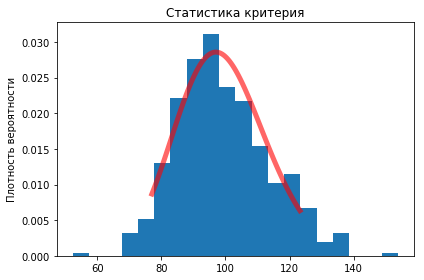

In [13]:
fig, ax = plt.subplots()

# histogram
n, bins, patches = ax.hist(criteria, 20, normed=True)

# plot
x = np.linspace(criterion_dist.ppf(0.05, n2 - 1), criterion_dist.ppf(0.95, n2-1), 100)
ax.plot(x, criterion_dist.pdf(x, n2-1), 'r-', lw=5, alpha=0.6, label='Theoretical')

ax.set_title("Статистика критерия")
ax.set_ylabel("Плотность вероятности")

fig.tight_layout()
plt.show()

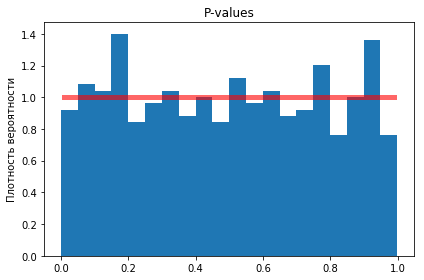

In [14]:
fig, ax = plt.subplots()

# histogram
n, bins, patches = ax.hist(p_values, 20, normed=True)

# plot
x = np.linspace(stats.uniform.ppf(0.01), stats.uniform.ppf(0.99), 100)
ax.plot(x, stats.uniform.pdf(x), 'r-', lw=5, alpha=0.6, label='Theoretical')

ax.set_title("P-values")
ax.set_ylabel("Плотность вероятности")

fig.tight_layout()
plt.show()
